In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
 import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...


True

In [3]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\gaura\.vscode\HTML\Desktop\New project\mynewv\Scripts\python.exe -m pip install --upgrade pip


In [5]:
from sklearn import set_config
set_config(display='diagram')


In [7]:
true_news_df = pd.read_csv('True.csv')
fake_new_df = pd.read_csv('Fake.csv')

In [8]:
true_news_df.isna().sum(), fake_new_df.isna().sum()

(title      0
 text       0
 subject    0
 date       0
 dtype: int64,
 title      0
 text       0
 subject    0
 date       0
 dtype: int64)

In [9]:
fake_new_df.loc[:, 'date'] = pd.to_datetime(fake_new_df['date'],format='mixed' , errors='coerce')
true_news_df.loc[:, 'date'] = pd.to_datetime(true_news_df['date'],format='mixed' , errors='coerce')

In [10]:
print(fake_new_df.isna().sum())

title       0
text        0
subject     0
date       10
dtype: int64


In [11]:
fake_new_df[fake_new_df.date.isna()]

,title,text,subject,date
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT


In [12]:
fake_new_df.dropna(axis=0,  how='any', inplace=True)


In [13]:
true_news_df['label'] =0 # True News
fake_new_df['label'] = 1 # Fake News

# Combine
df = pd.concat([fake_new_df, true_news_df]).sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
df.head()

,title,text,subject,date,label
0,LOL! HYPOCRITE HILLARY Gives Speech On Evils O...,Fat ass fraud in a pants suit When Hillary Cli...,politics,2016-06-07 00:00:00,1
1,Iran confirms upholding death sentence for aca...,DUBAI (Reuters) - Iran s Supreme Court has uph...,worldnews,2017-12-25 00:00:00,0
2,MSNBC’S MIKA ATTACKS MELANIA TRUMP…A Furious M...,Mika is all of a sudden aware of the Trump s m...,left-news,2017-06-30 00:00:00,1
3,DNC CHAIR Pulls Tired Race Card: Claims “Racis...,DNC Chair Tom Perez is a fear mongering racist...,left-news,2017-07-20 00:00:00,1
4,GOP Strategist STUNS As She Calls Trump Not E...,Ana Navarro is a well-known Republican strateg...,News,2016-08-03 00:00:00,1


In [15]:
df.describe(include='all')


C:\Users\gaura\AppData\Local\Temp\ipykernel_7324\1192053151.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df.describe(include='all')


,title,text,subject,date,label
count,44888,44888,44888,44888,44888.000000
unique,38723,38640,8,1010,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,2017-12-20 00:00:00,NaN
freq,14,627,11272,197,NaN
mean,NaN,NaN,NaN,NaN,0.522879
std,NaN,NaN,NaN,NaN,0.499482
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [16]:
df.info()
print("\n Null Values \n",df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44888 non-null  object
 1   text     44888 non-null  object
 2   subject  44888 non-null  object
 3   date     44888 non-null  object
 4   label    44888 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB

 Null Values 
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [17]:
df['date'] = pd.to_datetime(df['date'], format='mixed',errors='coerce')

Fully duplicated rows: 405


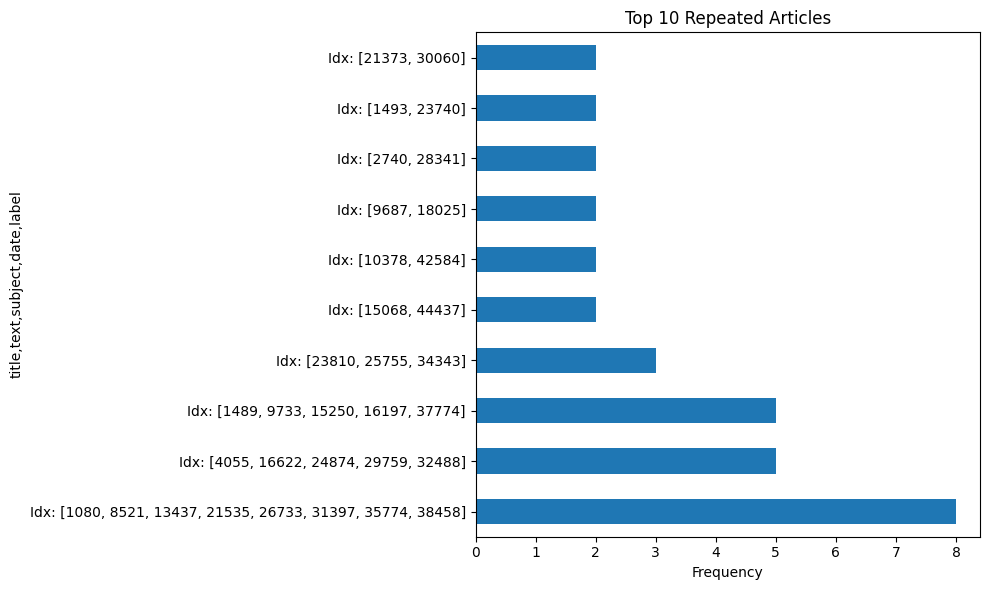

In [18]:
full_duplicates = df[df.duplicated(keep=False)]

print(f"Fully duplicated rows: {full_duplicates.shape[0]}")

# Visualize top repeated articles with their indices
top_duplicates = full_duplicates.value_counts().head(10)
top_indices = [full_duplicates[(full_duplicates == row).all(axis=1)].index.tolist() for row in top_duplicates.index]
labels = [f"Idx: {inds}" for inds in top_indices]

top_duplicates.plot(kind='barh', figsize=(10,6), title='Top 10 Repeated Articles')
plt.xlabel("Frequency")
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.tight_layout()
plt.show()

In [19]:
# Backup original dataset
df_original = df.copy()

# STEP 1: Drop fully identical rows
df_step1 = df.drop_duplicates()
removed_full_duplicates = df_original.shape[0] - df_step1.shape[0]
print(f"Step 1 - Removed fully duplicated rows: {removed_full_duplicates}")

# STEP 2: Remove duplicates where both 'text' and 'label' are the same, keep latest by 'date'
df_step1.loc[:, 'date'] = pd.to_datetime(df_step1['date'], errors='coerce')
df_step2 = df_step1.sort_values('date').drop_duplicates(subset=['text', 'label'], keep='last')
removed_text_label_duplicates = df_step1.shape[0] - df_step2.shape[0]
print(f"Step 2 - Removed duplicates with same 'text' and 'label' (kept latest): {removed_text_label_duplicates}")

# STEP 3: Remove entries with conflicting labels for the same 'text'
label_conflicts = df_step2.groupby('text')['label'].nunique()
conflicted_texts = label_conflicts[label_conflicts > 1].index
df_final = df_step2[~df_step2['text'].isin(conflicted_texts)].copy()
removed_label_conflicts = df_step2.shape[0] - df_final.shape[0]
print(f"Step 3 - Removed entries with conflicting labels on same text: {removed_label_conflicts}")

# FINAL SUMMARY
total_removed = removed_full_duplicates + removed_text_label_duplicates + removed_label_conflicts
print(f"\n Total records removed after all steps: {total_removed}")
print(f" Final dataset shape: {df_final.shape}")


Step 1 - Removed fully duplicated rows: 209
Step 2 - Removed duplicates with same 'text' and 'label' (kept latest): 6038
Step 3 - Removed entries with conflicting labels on same text: 2

 Total records removed after all steps: 6249
 Final dataset shape: (38639, 5)


In [20]:
df_final.sample(10)

,title,text,subject,date,label
23890,Elizabeth Warren Just SHREDDED Trump For Bein...,Have you noticed that Donald Trump has opted t...,News,2016-10-19,1
35424,IS TIM ALLEN’S “Last Man Standing” About To Be...,Tim Allen took to Twitter to express his disap...,left-news,2017-05-20,1
10473,Confused Old Man Forgets He’s At Arlington Ce...,Donald Trump showed up at Arlington National C...,News,2017-05-29,1
33131,EU calls for legal commission to vet new Polis...,BRUSSELS (Reuters) - The European Commission c...,worldnews,2017-09-25,0
3465,Haha! Hot Mic Catches Schumer Saying Trump ‘Li...,Senate Minority Leader Chuck Schumer thinks he...,politics,2017-09-14,1
24288,"Seeking end to boycott, North Carolina rescind...",(Reuters) - North Carolina on Thursday repeale...,politicsNews,2017-03-30,0
13562,U.S. senator was told of link between Iran san...,WASHINGTON (Reuters) - When implementation of ...,politicsNews,2016-01-20,0
39122,Sound in Atlantic not from missing Argentine s...,"MAR DEL PLATA, Argentina/BUENOS AIRES (Reuters...",worldnews,2017-11-20,0
21805,Cosmetic Company Posts Pic Of Black Woman’s L...,Racism is still very prevalent in America. And...,News,2016-02-18,1
24772,Trump's election panel puts hold on voter data...,(Reuters) - U.S. President Donald Trump’s comm...,politicsNews,2017-07-10,0


Class counts:
label
0    21191
1    17448
Name: count, dtype: int64


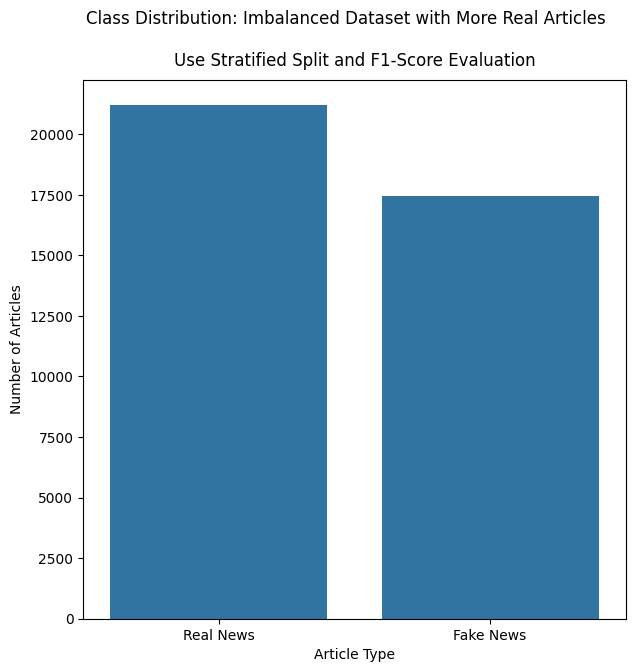

In [21]:
# Count number of samples per label
class_counts = df_final['label'].value_counts()

print("Class counts:")
print(class_counts)

# Map label values to meaningful names
label_names = {0: 'Real News', 1: 'Fake News'}

# Plot class distribution with labeled x-ticks
plt.figure(figsize=(7,7))
sns.barplot(x=[label_names[i] for i in class_counts.index], y=class_counts.values)
plt.suptitle("Class Distribution: Imbalanced Dataset with More Real Articles\n", fontsize=12)
plt.title("Use Stratified Split and F1-Score Evaluation", pad=10)
plt.xlabel("Article Type")
plt.ylabel("Number of Articles")
plt.xticks(rotation=0)

plt.show()


In [22]:
# Calculate text and title lengths
df_final['text_length'] = df_final['text'].apply(len)
df_final['title_length'] = df_final['title'].apply(len)

# Count punctuation marks
df_final['exclamations_mark_count'] = df_final['text'].str.count('!')
df_final['questions_mark_count'] = df_final['text'].str.count(r'\?')

# Count fully uppercase words
df_final['uppercase_words_count'] = df_final['text'].apply(
    lambda x: sum(1 for w in x.split() if w.isupper())
)

# Ensure 'date' column is in datetime format
df_final['date'] = pd.to_datetime(df_final['date'], errors='coerce')

# Extract day of the week from the 'date' column
df_final['day_of_week'] = df_final['date'].dt.day_name()

In [23]:
df_final.sample(10)

,title,text,subject,date,label,text_length,title_length,exclamations_mark_count,questions_mark_count,uppercase_words_count,day_of_week
23181,Citibanamex lowers Mexico 2017 GDP to 1.9 perc...,MEXICO CITY (Reuters) - Citigroup Inc s local ...,worldnews,2017-09-21,0,1138,62,0,0,4,Thursday
38578,Facebook says Russian-linked accounts spent ju...,LONDON (Reuters) - Russian-based operatives pl...,worldnews,2017-12-13,0,2104,76,0,0,17,Wednesday
36148,Egyptian court hands fresh life sentence to Mu...,CAIRO (Reuters) - An Egyptian court sentenced ...,worldnews,2017-09-28,0,1699,69,0,0,1,Thursday
8172,BOMBSHELL: Trump Is Being Investigated By SIX...,You can probably expect Donald Trump to contin...,News,2017-01-18,1,2315,105,0,0,4,Wednesday
9880,CBS Reporter Assaulted By Cops At Cancelled U...,CBS journalist Sopan Deb was covering Donald T...,News,2016-03-12,1,2083,68,1,0,8,Saturday
19062,Turkey expects visa spat with U.S. to be resol...,WASHINGTON (Reuters) - A diplomatic crisis bet...,worldnews,2017-10-11,0,2589,65,0,0,14,Wednesday
43123,Publisher Announces Books By The Obamas Are O...,Penguin Random House announced on Tuesday nigh...,News,2017-02-28,1,2612,66,0,1,5,Tuesday
11192,This University Will Punish You For Being Rap...,Imagine being a woman going to a university wh...,News,2016-05-01,1,3545,79,0,0,26,Sunday
33682,Tale of two cities: Kurdish vote lays bare pol...,"SULAIMANIYA, Iraq (Reuters) - Some Kurdish lea...",worldnews,2017-09-25,0,4403,62,0,0,11,Monday
42711,Obama not involved in attorney general's decis...,WASHINGTON (Reuters) - The U.S. Justice Depart...,politicsNews,2016-07-01,0,501,79,0,0,2,Friday


In [24]:
def plot_label_distribution(df, x, y, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
    plt.suptitle(title, fontsize=14)

    # Box Plot
    sns.boxplot(data=df, x=df[x], y=df[y], ax=axes[0], palette='Set2', hue=df[x])
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Real (0)', 'Fake (1)'])
    axes[0].set_xlabel("News")
    axes[0].set_ylabel(y.replace('_', ' ').title())

    # Histogram / KDE
    sns.histplot(data=df, x=df[y], hue=df[x], kde=True, ax=axes[1],
                 element='step', stat='density', common_norm=False, palette='Set2')
    axes[1].set_xlabel(y.replace('_', ' ').title())
    axes[1].set_ylabel("Density")

    plt.tight_layout()
    plt.show()


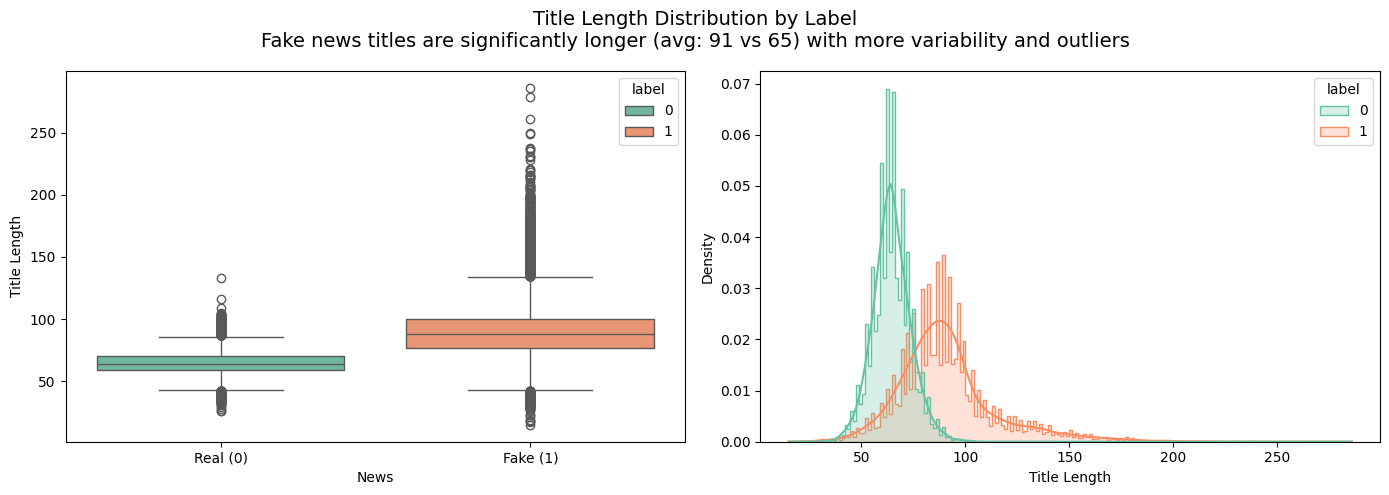

In [25]:
plot_label_distribution(df_final,
                        x='label',
                        y='title_length',
                        title=   ( "Title Length Distribution by Label\n"
    "Fake news titles are significantly longer (avg: 91 vs 65) with more variability and outliers"),

                        )

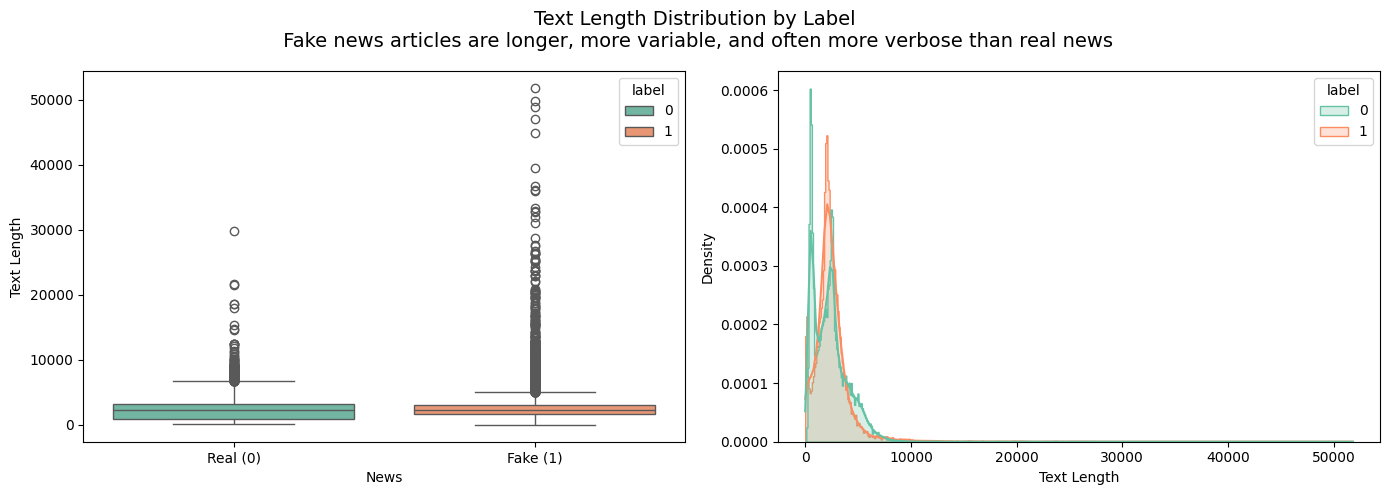

In [26]:
plot_label_distribution(
    df_final,
    x='label',
    y='text_length',
    title=("Text Length Distribution by Label\n Fake news articles are longer, more variable, and often more verbose than real news")
)

In [27]:
def get_top_n_words(data, n=None):
    vec = CountVectorizer(stop_words='english').fit(data)
    bag = vec.transform(data)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

In [28]:
real_df = pd.DataFrame(get_top_n_words(df_final[df_final['label'] == 0]['text'], 20))
fake_df = pd.DataFrame(get_top_n_words(df_final[df_final['label'] == 1]['text'], 20))


In [30]:


def plot_top_words(word_df, x_label='Frequency', y_label='Word', title='Top Words'):
    # Rename columns for consistency
    word_df.columns = ['word', 'freq']

    # Generate color palette
    # colors = sns.color_palette("deep", len(word_df))

    # Create the plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=word_df,
        x='freq',
        y='word',
        # hue='word',
        dodge=False
        # palette=colors
    )


    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()



    # Show the plot
    plt.show()


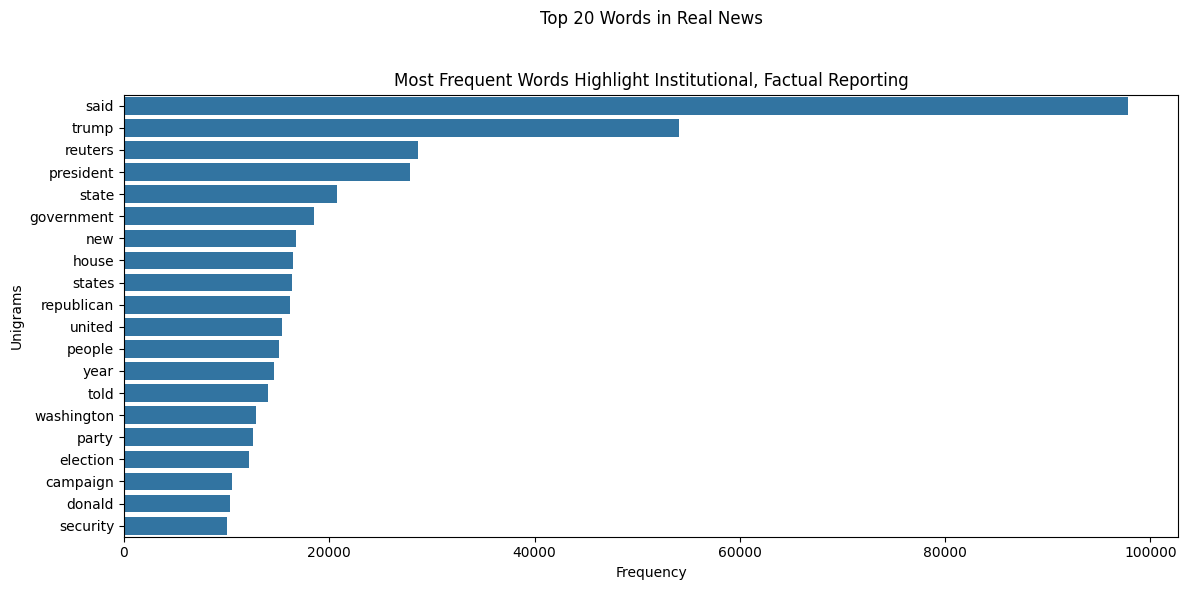

In [31]:
plot_top_words(
    real_df,
    title='Top 20 Words in Real News\n\n\nMost Frequent Words Highlight Institutional, Factual Reporting',
    x_label='Frequency',
    y_label='Unigrams',
)

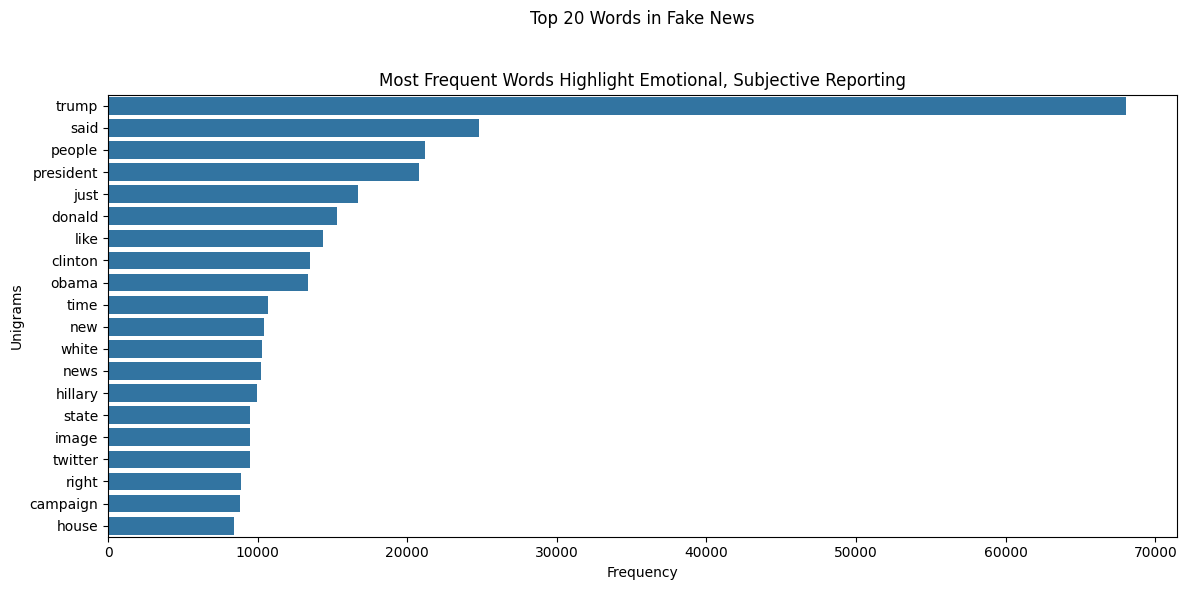

In [32]:
plot_top_words(
    fake_df,
    title='Top 20 Words in Fake News\n\n\nMost Frequent Words Highlight Emotional, Subjective Reporting',
    x_label='Frequency',
    y_label='Unigrams',
)

In [33]:
processed_df = df_final.drop(columns=['date', 'day_of_week'], axis=1).reset_index()

In [34]:
processed_df.info(), processed_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38639 entries, 0 to 38638
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    38639 non-null  int64 
 1   title                    38639 non-null  object
 2   text                     38639 non-null  object
 3   subject                  38639 non-null  object
 4   label                    38639 non-null  int64 
 5   text_length              38639 non-null  int64 
 6   title_length             38639 non-null  int64 
 7   exclamations_mark_count  38639 non-null  int64 
 8   questions_mark_count     38639 non-null  int64 
 9   uppercase_words_count    38639 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 2.9+ MB


(None,
 index                      0
 title                      0
 text                       0
 subject                    0
 label                      0
 text_length                0
 title_length               0
 exclamations_mark_count    0
 questions_mark_count       0
 uppercase_words_count      0
 dtype: int64)

In [35]:
processed_df.to_csv('cleaned_news.csv', index=False)


In [36]:
data_news = pd.read_csv('cleaned_news.csv')
data_news.shape, data_news.isna().sum()
data_news.label.value_counts()

label
0    21191
1    17448
Name: count, dtype: int64

In [37]:
# creating a custom transformer
from sklearn.base  import BaseEstimator, TransformerMixin


class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = stopwords.words('english')
        self.freqwords = set([
            'trump', 'president', 'reuters', 'state', 'donald',
            'states', 'house', 'government', 'republican', 'united'
        ])
        self.stopwords_set = set(self.stop_words).union(self.freqwords)
        self.lemmatizer = WordNetLemmatizer()

    def preprocess_text(self, text):
        # Lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)

        # Remove standalone numbers
        text = re.sub(r'\b\d+\b', '', text)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove punctuation
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)

        # Remove newlines and unicode punctuation
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[’“”…]', '', text)

        # Remove emojis
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        text = emoji_pattern.sub('', text)

        # Expand contractions
        contractions = {
            "isn't": "is not", "he's": "he is", "wasn't": "was not", "there's": "there is",
            "couldn't": "could not", "won't": "will not", "they're": "they are", "she's": "she is",
            "wouldn't": "would not", "haven't": "have not", "that's": "that is", "you've": "you have",
            "what's": "what is", "weren't": "were not", "we're": "we are", "hasn't": "has not",
            "you'd": "you would", "shouldn't": "should not", "let's": "let us", "they've": "they have",
            "you'll": "you will", "i'm": "i am", "we've": "we have", "it's": "it is", "don't": "do not",
            "that´s": "that is", "i´m": "i am", "it’s": "it is", "she´s": "she is", "i’m": "i am",
            "i’d": "i did", "there’s": "there is"
        }

        for contraction, expanded in contractions.items():
            text = re.sub(rf"\b{re.escape(contraction)}\b", expanded, text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords
        tokens = [word for word in tokens if word not in self.stopwords_set]

        # Lemmatize
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]

        # Return processed string
        return ' '.join(tokens)


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess_text(text) for text in X]


In [43]:
data_news['text_cleaned'] = TextPreprocessor().fit_transform(data_news['text'])


In [44]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
def train_and_evaluate_model(X,y,model=MultinomialNB(), model_name='MultinominalNB', vecotrizer='CountVectorizer'):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=42)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    f1score = f1_score(predicted, y_test)
    print(f'{model_name} model accuracy is {f1score*100 : 04.2f}% using {vecotrizer}')
    print('------------------------------------------------')
    print('Classification Report:')
    print(classification_report(y_test, predicted))
    return model, predicted, f1score, X_test, y_test


In [45]:
# vecotrization

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')


tfid = CountVectorizer(
    stop_words=None,
    ngram_range=(1,1),
    tokenizer=token.tokenize,
    token_pattern=None
)

text_counts_1_2 = tfid.fit_transform(data_news['text_cleaned'])


In [46]:
_, _, _ , _, _ = train_and_evaluate_model(text_counts_1_2, data_news['label'])

MultinominalNB model accuracy is  95.28% using CountVectorizer
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4238
           1       0.96      0.95      0.95      3490

    accuracy                           0.96      7728
   macro avg       0.96      0.96      0.96      7728
weighted avg       0.96      0.96      0.96      7728



In [47]:
data_news.head()

,index,title,text,subject,label,text_length,title_length,exclamations_mark_count,questions_mark_count,uppercase_words_count,text_cleaned
0,38938,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,1,1245,130,0,0,4,gay mafia new corporate article need read shee...
1,9407,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,1,3157,117,0,5,14,anyone really think hillary clinton come clean...
2,2119,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,1,1994,76,0,1,0,irony lost u hillary compared wanted take nixo...
3,32635,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,1,658,80,0,1,4,case missed sen harry reid rnv announced last ...
4,17073,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,1,2488,49,0,4,5,nothing like political cronyism make stomach c...


In [48]:
# final_df = news_df.merge(new_text_df, left_index=True, right_index=True)

final_df = data_news.drop(columns=['title', 'text', 'title_length'])

# final_df.rename(columns={'no_sw_lem': 'text_cleaned'}, inplace=True)
# final_df.head()



X = final_df.drop(columns=['label' ,'subject'])
y = final_df.label



X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=42
                                                    )

In [49]:
X['text_cleaned'] = X['text_cleaned'].astype(str)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38639 entries, 0 to 38638
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    38639 non-null  int64 
 1   text_length              38639 non-null  int64 
 2   exclamations_mark_count  38639 non-null  int64 
 3   questions_mark_count     38639 non-null  int64 
 4   uppercase_words_count    38639 non-null  int64 
 5   text_cleaned             38639 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.8+ MB


In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30911, 6), (7728, 6), (30911,), (7728,))

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30911 entries, 21252 to 8773
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    30911 non-null  int64 
 1   text_length              30911 non-null  int64 
 2   exclamations_mark_count  30911 non-null  int64 
 3   questions_mark_count     30911 non-null  int64 
 4   uppercase_words_count    30911 non-null  int64 
 5   text_cleaned             30911 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.7+ MB


In [52]:

trf1 = ColumnTransformer(
    transformers=[
        ('vectorizer', CountVectorizer(), 'text_cleaned')
    ],
    remainder='passthrough',  # keeps metadata columns

    force_int_remainder_cols=False # treat remainder columns by name, not index.
)

model_pipe = Pipeline(
    steps=[
        ('trf1', trf1),
        ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss'))
    ]
)

model_pipe  # Displays a diagram of the pipeline

Pipeline(steps=[('trf1',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('vectorizer',
                                                  CountVectorizer(),
                                                  'text_cleaned')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_cat...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [53]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('vectorizer',
                                                  CountVectorizer(),
                                                  'text_cleaned')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_cat...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [54]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model_pipe, X_train, y_train, cv=5)

In [55]:
print("Cross-Validation Accuracy Scores:", score)
print(f"Mean Accuracy: { score.mean()*100:.2f}%")

Cross-Validation Accuracy Scores: [0.98560569 0.98236817 0.98317697 0.98738272 0.98819152]
Mean Accuracy: 98.53%


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'trf1__vectorizer__ngram_range': [(1, 1), (1, 2)],
    'trf1__vectorizer__max_features': randint(2000, 6000),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(3, 10)
}

random_search = RandomizedSearchCV(
    model_pipe,
    param_distributions=param_dist,
    n_iter=25,  # number of random combos
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
best_params = random_search.best_params_
from pprint import pprint
pprint(best_params)

# saving these parameters
import pickle
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

# {'classifier__learning_rate': np.float64(0.24555278841790407),
#  'classifier__max_depth': 5,
#  'classifier__n_estimators': 463,
#  'trf1__vectorizer__max_features': 5638,
#  'trf1__vectorizer__ngram_range': (1, 2)}

In [ ]:
best_model_pipeline = random_search.best_estimator_

In [ ]:
best_model_pipeline.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score, classification_report
y_pred = best_model_pipeline.predict(X_test)

f1score= f1_score(y_test, y_pred)*100

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(best_model_pipeline, X, y, cv=skf, scoring='f1')
print("F1 Scores per fold:", scores)